# Crypto Churn Prediction - Exploratory Data Analysis

This notebook provides exploratory analysis of the crypto trading platform user data.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/crypto_users.csv')

print(f"Dataset shape: {df.shape}")
print(f"Churn rate: {df['churned'].mean():.2%}")

Dataset shape: (50000, 19)
Churn rate: 51.07%


## Data Overview

In [2]:
# First few rows
df.head()

,user_id,segment,account_age_days,portfolio_value,n_assets,trades_30d,avg_trade_size,days_since_login,trade_freq_trend,yield_adoption,advanced_trading,volatility_sensitivity,portfolio_return_30d,churned,trading_intensity,portfolio_concentration,engagement_score,high_risk_profile,account_stage
0,user_000000,casual,98,428.32,3,5,73.61,10.0,-0.568,0,0,-1.011,21.43,0,0.429383,0.333333,0,1,established
1,user_000001,power_user,225,64059.96,5,43,16771.60,1.1,0.539,0,1,-0.853,12.19,0,2.856468,0.200000,4,0,mature
2,user_000002,active,312,10945.50,4,34,1038.96,0.3,0.177,1,0,1.379,11.93,0,2.070279,0.250000,4,0,mature
3,user_000003,casual,21,311.02,3,1,65.92,0.6,0.465,0,0,-1.269,-14.68,1,0.167755,0.333333,2,0,new
4,user_000004,casual,35,1836.99,1,7,469.67,25.7,-0.487,0,1,0.956,-17.91,1,0.908552,1.000000,2,1,growing


In [3]:
# Summary statistics
df.describe()

,account_age_days,portfolio_value,n_assets,trades_30d,avg_trade_size,days_since_login,trade_freq_trend,yield_adoption,advanced_trading,volatility_sensitivity,portfolio_return_30d,churned,trading_intensity,portfolio_concentration,engagement_score,high_risk_profile
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,119.92868,19866.046926,2.352260,23.197280,3462.990793,6.723416,-0.121819,0.255420,0.196240,0.003462,1.979103,0.51074,2.284869,0.623593,2.712440,0.594640
std,85.10747,86867.952836,1.624138,33.659605,16558.139206,10.878505,0.349978,0.436101,0.397156,0.997555,14.972341,0.49989,4.125709,0.333222,1.322477,0.490966
min,1.00000,100.000000,1.000000,0.000000,5.500000,0.000000,-1.348000,0.000000,0.000000,-4.096000,-63.830000,0.00000,0.000000,0.100000,0.000000,0.000000
25%,58.00000,885.320000,1.000000,5.000000,127.240000,0.800000,-0.385000,0.000000,0.000000,-0.668000,-8.250000,0.00000,0.479791,0.333333,2.000000,0.000000
50%,101.00000,1679.975000,2.000000,11.000000,306.745000,2.200000,-0.118000,0.000000,0.000000,0.005000,1.970000,1.00000,1.043348,0.500000,3.000000,1.000000
75%,161.00000,11040.530000,3.000000,27.000000,1620.140000,6.600000,0.130000,1.000000,0.000000,0.676000,12.130000,1.00000,2.482793,1.000000,4.000000,1.000000
max,730.00000,999367.020000,10.000000,609.000000,297861.350000,90.000000,1.266000,1.000000,1.000000,3.981000,62.990000,1.00000,214.216677,1.000000,5.000000,1.000000


In [4]:
# Missing values
df.isnull().sum()

user_id                    0
segment                    0
account_age_days           0
portfolio_value            0
n_assets                   0
trades_30d                 0
avg_trade_size             0
days_since_login           0
trade_freq_trend           0
yield_adoption             0
advanced_trading           0
volatility_sensitivity     0
portfolio_return_30d       0
churned                    0
trading_intensity          0
portfolio_concentration    0
engagement_score           0
high_risk_profile          0
account_stage              0
dtype: int64

## Churn Analysis

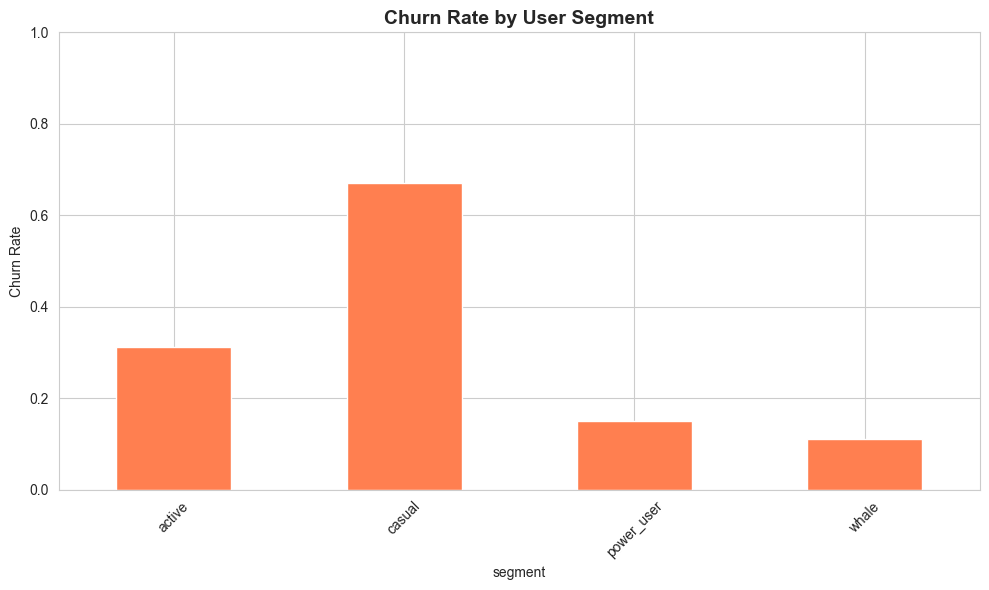

                mean  count
segment                    
active      0.312809  14974
casual      0.670338  30049
power_user  0.150640   3983
whale       0.110664    994


In [5]:
# Churn by segment
fig, ax = plt.subplots(figsize=(10, 6))
churn_by_segment = df.groupby('segment')['churned'].agg(['mean', 'count'])
churn_by_segment['mean'].plot(kind='bar', ax=ax, color='coral')
ax.set_title('Churn Rate by User Segment', fontsize=14, fontweight='bold')
ax.set_ylabel('Churn Rate')
ax.set_ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(churn_by_segment)

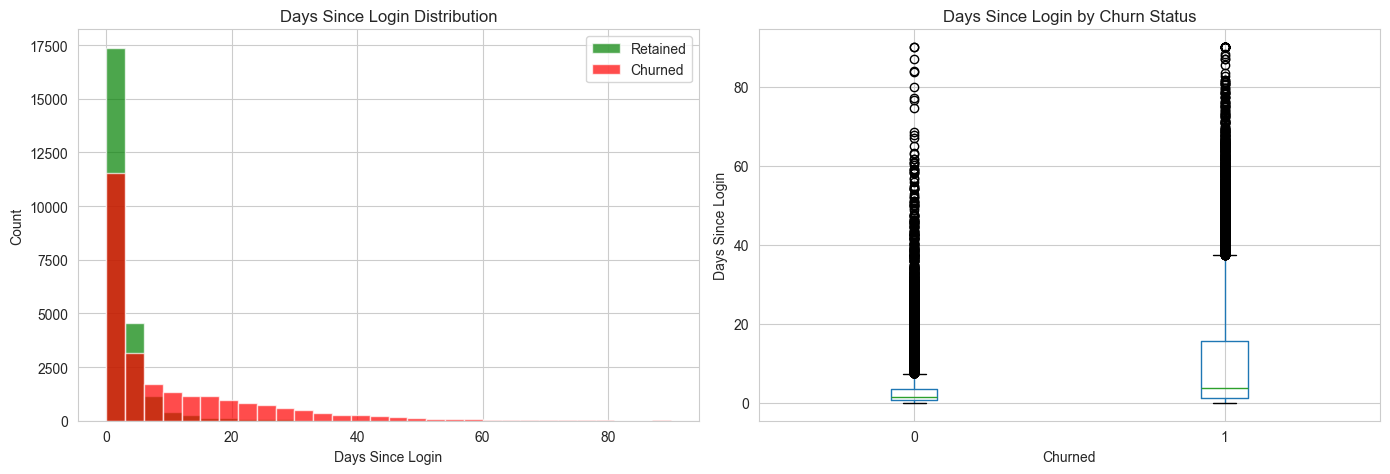

In [6]:
# Distribution of days since login (key predictor)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churned vs retained
df[df['churned']==0]['days_since_login'].hist(bins=30, ax=axes[0], alpha=0.7, label='Retained', color='green')
df[df['churned']==1]['days_since_login'].hist(bins=30, ax=axes[0], alpha=0.7, label='Churned', color='red')
axes[0].set_xlabel('Days Since Login')
axes[0].set_ylabel('Count')
axes[0].set_title('Days Since Login Distribution')
axes[0].legend()

# Box plot
df.boxplot(column='days_since_login', by='churned', ax=axes[1])
axes[1].set_xlabel('Churned')
axes[1].set_ylabel('Days Since Login')
axes[1].set_title('Days Since Login by Churn Status')

plt.suptitle('')
plt.tight_layout()
plt.show()

## Feature Correlations

In [7]:
# Correlation with churn
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['churned'].sort_values(ascending=False)

print("Top correlations with churn:")
print(correlations)

Top correlations with churn:
churned                    1.000000
high_risk_profile          0.403031
portfolio_concentration    0.349256
days_since_login           0.332171
volatility_sensitivity     0.002201
account_age_days           0.001858
portfolio_return_30d      -0.048025
avg_trade_size            -0.143540
portfolio_value           -0.156125
advanced_trading          -0.209578
trading_intensity         -0.210756
yield_adoption            -0.255017
trades_30d                -0.258847
trade_freq_trend          -0.290206
n_assets                  -0.340587
engagement_score          -0.455303
Name: churned, dtype: float64


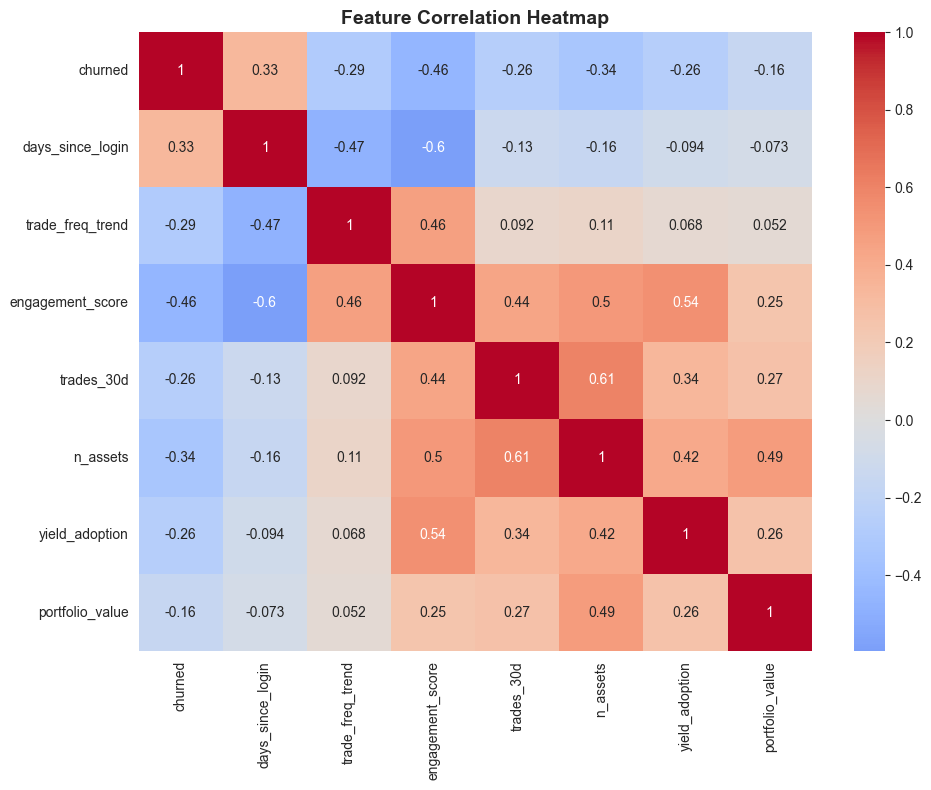

In [8]:
# Correlation heatmap (top features)
top_features = ['churned', 'days_since_login', 'trade_freq_trend', 'engagement_score', 
                'trades_30d', 'n_assets', 'yield_adoption', 'portfolio_value']

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Feature Deep Dive

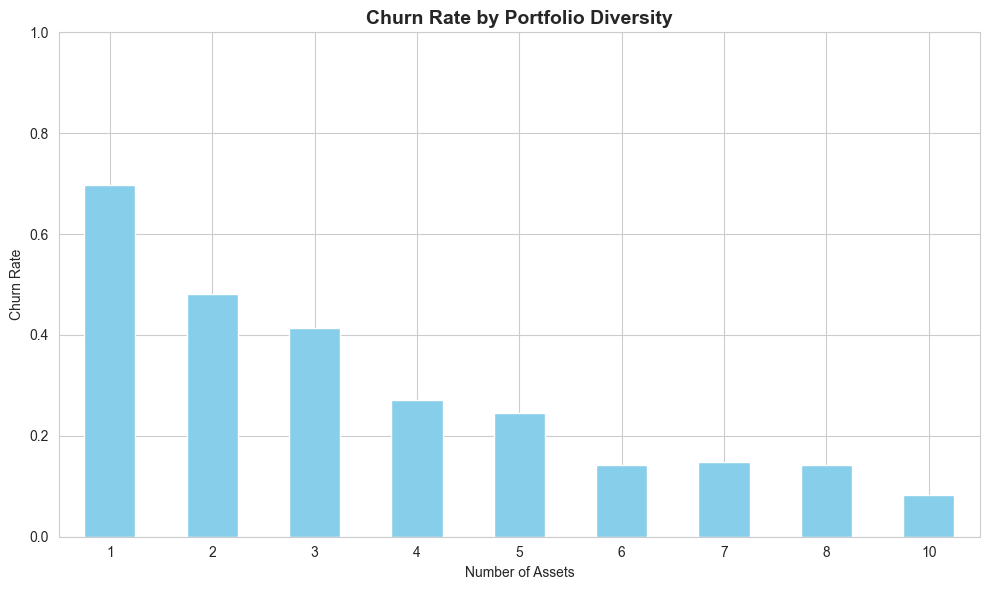

              mean  count
n_assets                 
1         0.696945  20917
2         0.480762  10656
3         0.412990   8976
4         0.270341   3847
5         0.245694   2845
6         0.141921   1374
7         0.148784    699
8         0.142114    577
10        0.082569    109


In [9]:
# Portfolio diversity impact
churn_by_assets = df.groupby('n_assets')['churned'].agg(['mean', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))
churn_by_assets['mean'].plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Churn Rate by Portfolio Diversity', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Assets')
ax.set_ylabel('Churn Rate')
ax.set_ylim([0, 1])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(churn_by_assets)

In [10]:
# Yield adoption impact
print("Churn by Yield Adoption:")
print(df.groupby('yield_adoption')['churned'].agg(['mean', 'count']))

# Advanced trading impact
print("\nChurn by Advanced Trading Adoption:")
print(df.groupby('advanced_trading')['churned'].agg(['mean', 'count']))

Churn by Yield Adoption:
                    mean  count
yield_adoption                 
0               0.585404  37229
1               0.293086  12771

Churn by Advanced Trading Adoption:
                      mean  count
advanced_trading                 
0                 0.562506  40188
1                 0.298716   9812


## Cohort Analysis

C:\Users\rnpat\AppData\Local\Temp\ipykernel_7784\834323524.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('account_age_bucket')['churned'].agg(['mean', 'count'])


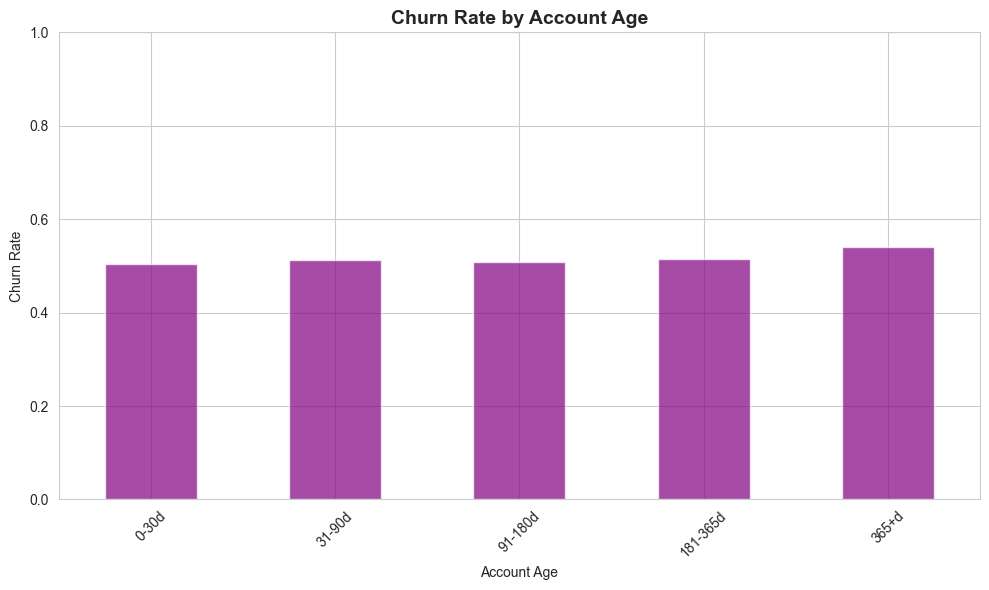

                        mean  count
account_age_bucket                 
0-30d               0.504058   4805
31-90d              0.512388  17436
91-180d             0.508043  17841
181-365d            0.513745   9094
365+d               0.540049    824


In [11]:
# Create account age buckets
df['account_age_bucket'] = pd.cut(df['account_age_days'], 
                                   bins=[0, 30, 90, 180, 365, 730],
                                   labels=['0-30d', '31-90d', '91-180d', '181-365d', '365+d'])

# Churn by account age
churn_by_age = df.groupby('account_age_bucket')['churned'].agg(['mean', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))
churn_by_age['mean'].plot(kind='bar', ax=ax, color='purple', alpha=0.7)
ax.set_title('Churn Rate by Account Age', fontsize=14, fontweight='bold')
ax.set_xlabel('Account Age')
ax.set_ylabel('Churn Rate')
ax.set_ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(churn_by_age)

## Key Insights

Based on this exploratory analysis:

1. **Days since login** is the strongest churn predictor
2. **Yield product adoption** significantly reduces churn
3. **Portfolio diversity** (more assets) correlates with better retention
4. **Casual users** have the highest churn rates
5. **Trading frequency trends** show declining activity before churn